In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [124]:
data = pd.read_csv(r"/kaggle/input/diabetes-classification-dataset/Diabetes Classification.csv")

In [125]:
data

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [126]:

data = data.drop(["Unnamed: 0"] , axis = 1)

In [127]:
data

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [128]:
data.isnull().sum()

Age          0
Gender       0
BMI          0
Chol         0
TG           0
HDL          0
LDL          0
Cr           0
BUN          0
Diagnosis    0
dtype: int64

In [129]:
data.duplicated().any()

False

<Axes: xlabel='Diagnosis', ylabel='count'>

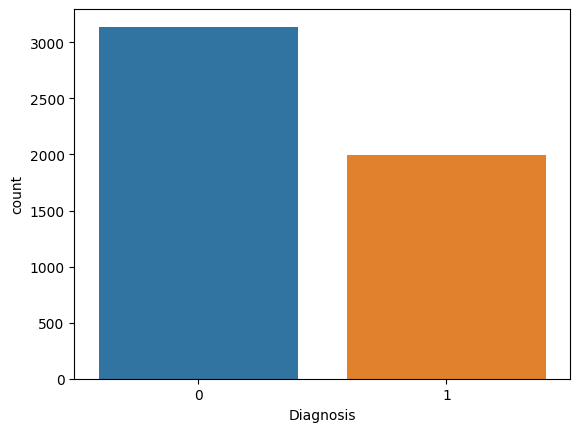

In [130]:
sn.countplot(x = "Diagnosis" , data = data)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5132 non-null   int64  
 1   Gender     5132 non-null   object 
 2   BMI        5132 non-null   int64  
 3   Chol       5132 non-null   float64
 4   TG         5132 non-null   float64
 5   HDL        5132 non-null   float64
 6   LDL        5132 non-null   float64
 7   Cr         5132 non-null   float64
 8   BUN        5132 non-null   float64
 9   Diagnosis  5132 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 401.1+ KB


In [132]:
data_gender = data["Gender"]

In [133]:
data_gender = pd.DataFrame(data_gender)

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
le = LabelEncoder()
data_gender = data_gender.apply(le.fit_transform)

In [136]:
data = data.drop(["Gender"] , axis = 1)

In [137]:
data

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...
5127,54,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [138]:
data = pd.concat([data, data_gender] , axis = 1)

In [139]:
data

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Gender
0,50,24,4.20,0.90,2.40,1.40,46.0,4.70,0,0
1,26,23,3.70,1.40,1.10,2.10,62.0,4.50,0,1
2,33,21,4.90,1.00,0.80,2.00,46.0,7.10,0,1
3,45,21,2.90,1.00,1.00,1.50,24.0,2.30,0,0
4,50,24,3.60,1.30,0.90,2.10,50.0,2.00,0,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,23,5.00,1.50,1.24,2.98,77.0,3.50,1,1
5128,50,22,4.37,2.09,1.37,2.29,47.3,4.40,1,0
5129,67,24,3.89,1.38,1.14,2.17,70.6,4.73,1,1
5130,60,29,5.91,1.29,1.73,2.85,50.2,7.33,1,0


In [140]:
data.describe()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis,Gender
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,48.950312,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348,0.634840
std,14.048794,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422,0.481926
min,20.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000,0.000000
25%,36.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000,0.000000
50%,49.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000,1.000000
75%,59.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000,1.000000
max,93.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000,2.000000


In [141]:
data.isna().sum()

Age          0
BMI          0
Chol         0
TG           0
HDL          0
LDL          0
Cr           0
BUN          0
Diagnosis    0
Gender       0
dtype: int64

<Axes: >

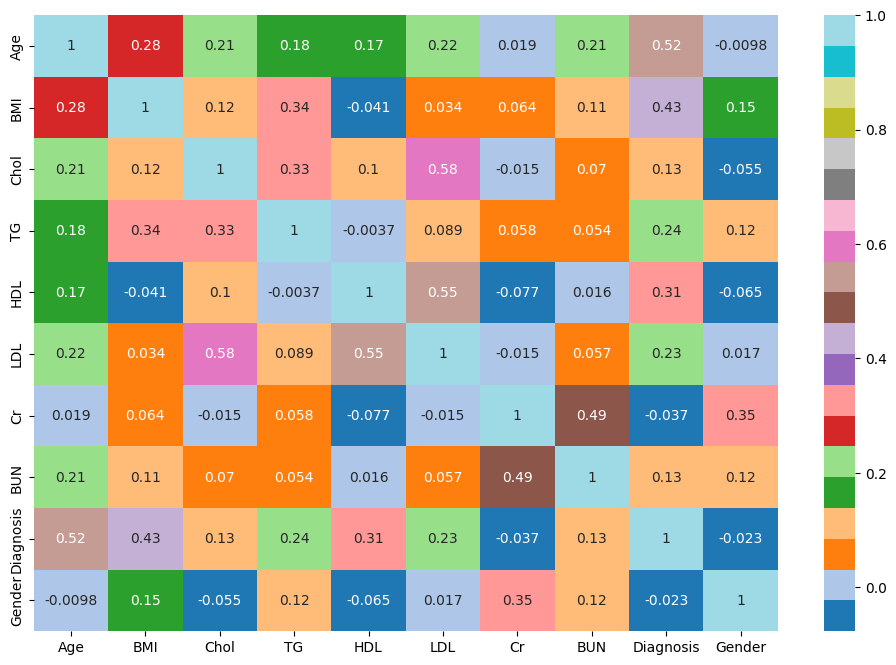

In [142]:
plt.figure(figsize = (12,8))
sn.heatmap(data.corr() , annot = True , cmap = "tab20")

In [143]:
data.columns

Index(['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN', 'Diagnosis',
       'Gender'],
      dtype='object')

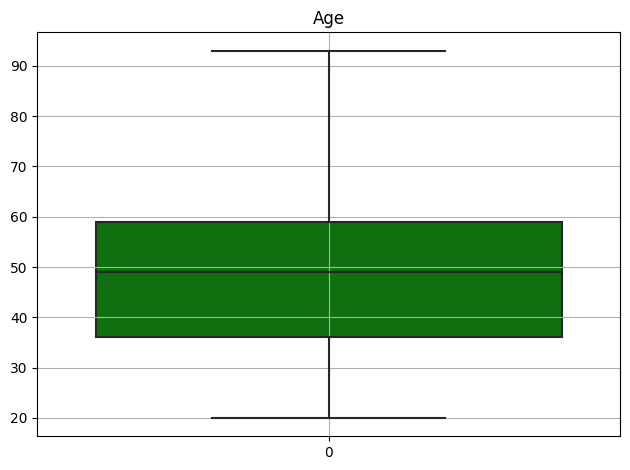

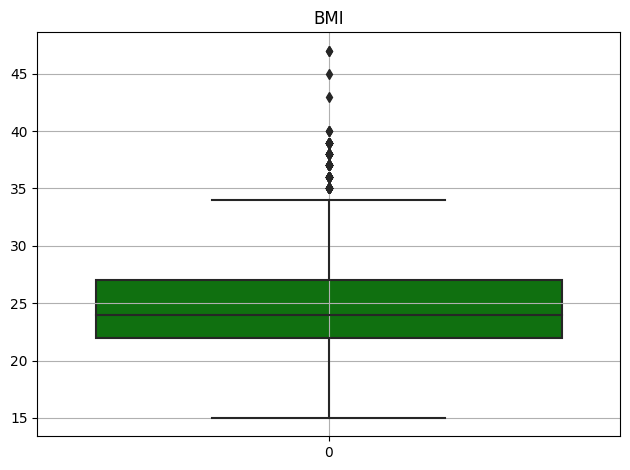

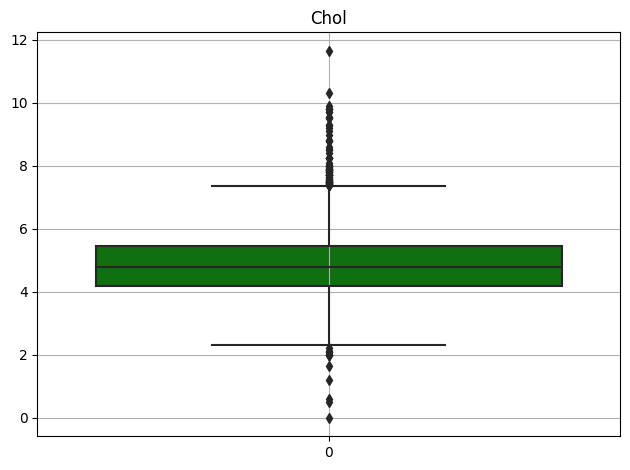

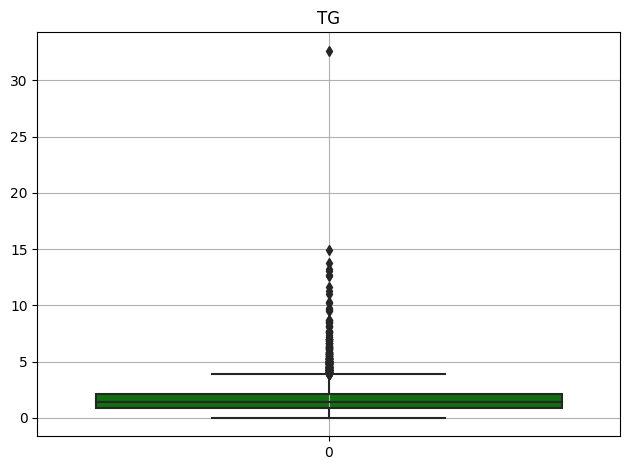

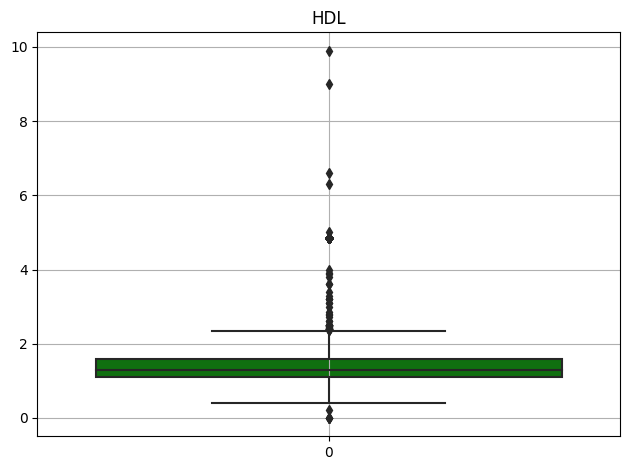

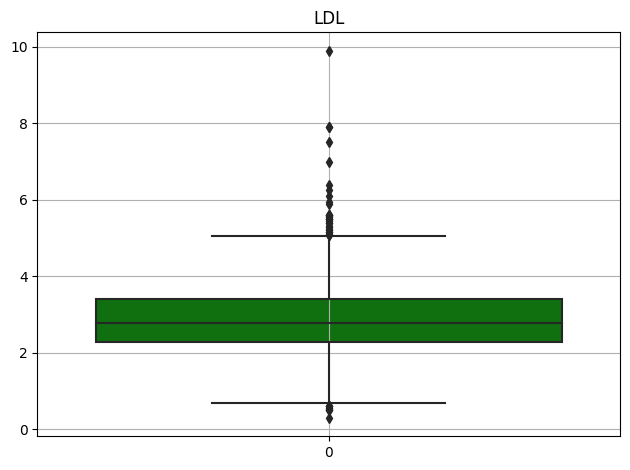

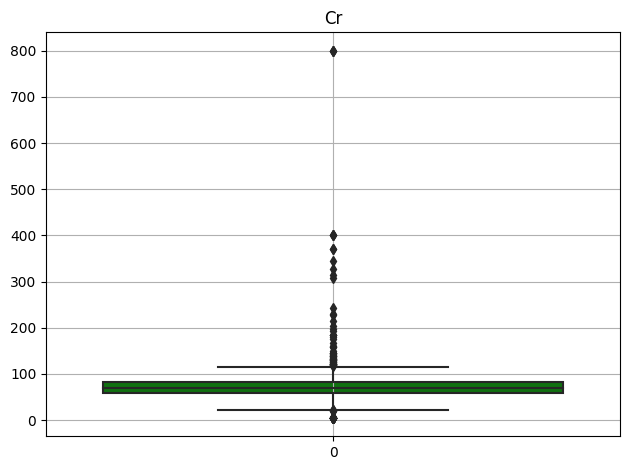

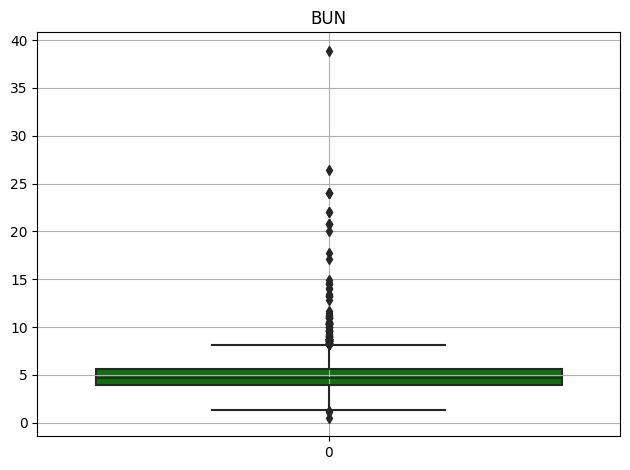

In [144]:
for i in ['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']:
    sn.boxplot(data[i] , color = "green")
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


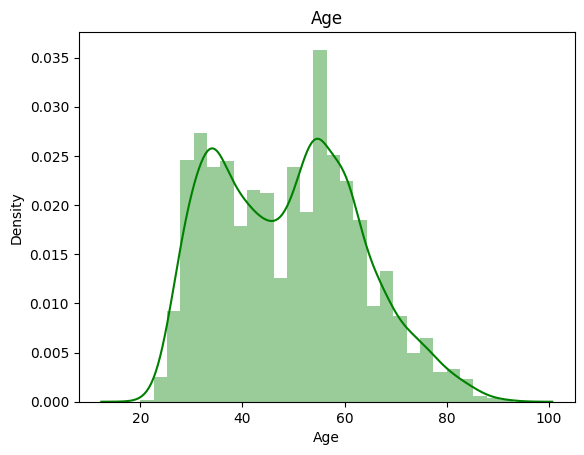

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


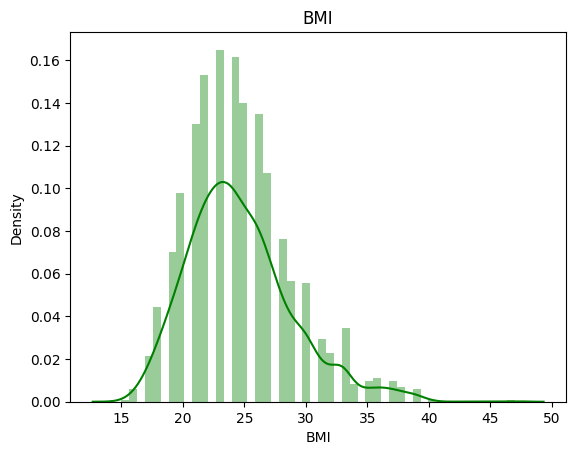

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


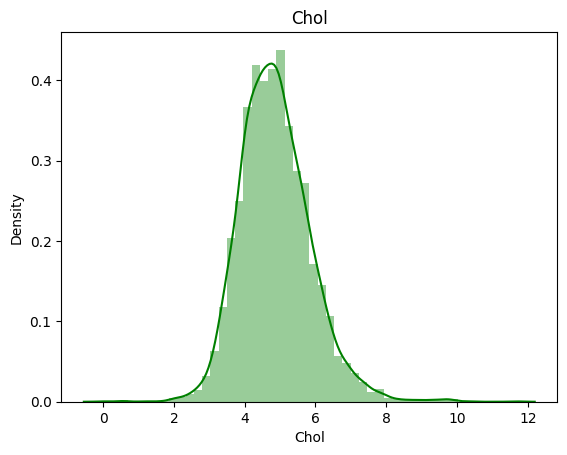

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


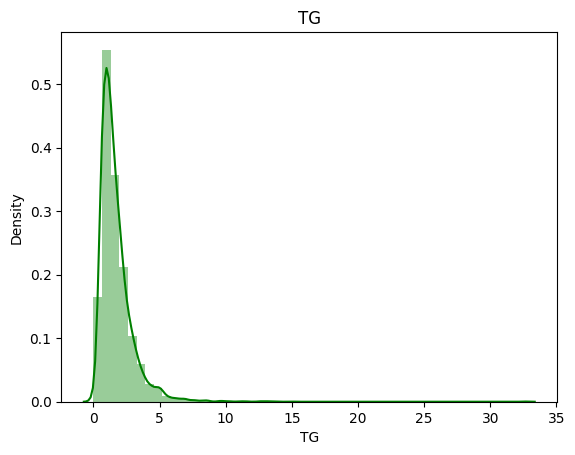

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


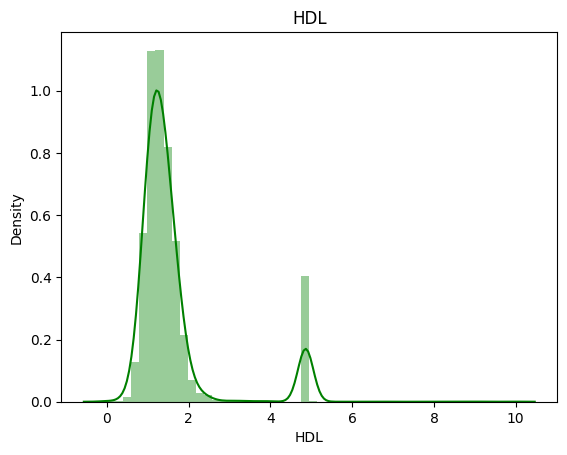

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


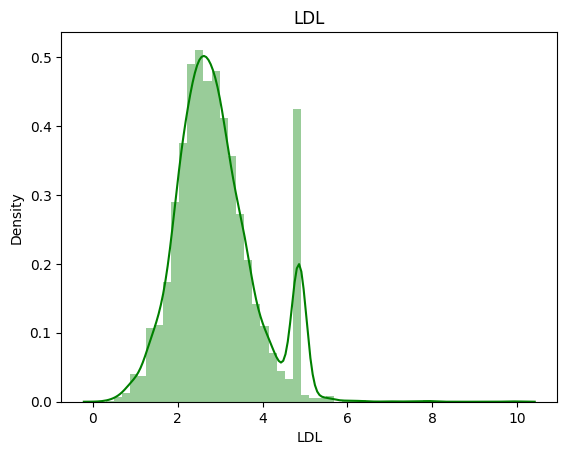

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


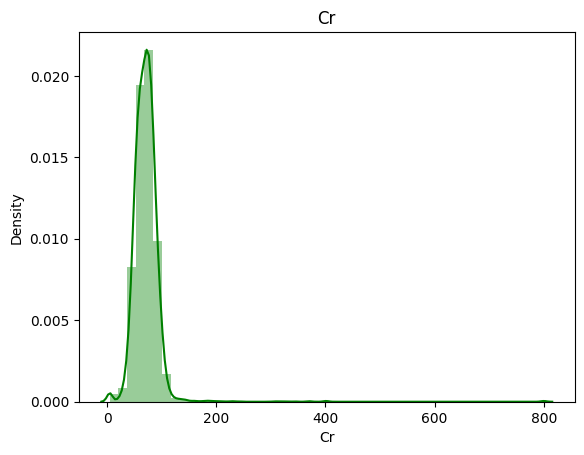

/tmp/ipykernel_34/1081022350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


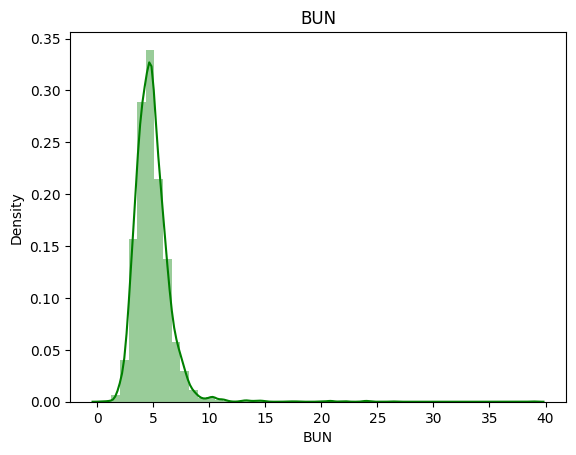

In [145]:
for i in ['Age', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']:
    sn.distplot(data[i] , color = "green")
    plt.title(i)
    plt.show()

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
data.skew()

Age           0.276515
BMI           0.815776
Chol          0.646266
TG            4.919582
HDL           2.642847
LDL           0.690178
Cr           11.896358
BUN           4.725352
Diagnosis     0.458313
Gender       -0.555051
dtype: float64

In [148]:
data.kurtosis()

Age           -0.698306
BMI            0.989344
Chol           2.043522
TG            69.368213
HDL            6.460247
LDL            0.936506
Cr           269.573445
BUN           58.539068
Diagnosis     -1.790647
Gender        -1.678135
dtype: float64

In [149]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
upper_bound = q3+1.5*(iqr)
lower_bound = q1-1.5*(iqr)
print(upper_bound)
print(lower_bound)

Age           93.500
BMI           34.500
Chol           7.365
TG             3.885
HDL            2.340
LDL            5.065
Cr           117.000
BUN            8.150
Diagnosis      2.500
Gender         2.500
dtype: float64
Age           1.500
BMI          14.500
Chol          2.285
TG           -0.875
HDL           0.340
LDL           0.625
Cr           22.600
BUN           1.350
Diagnosis    -1.500
Gender       -1.500
dtype: float64


In [150]:
data = data[~((data>upper_bound))|((data<lower_bound))]

In [151]:
data.shape

(5132, 10)

<Axes: >

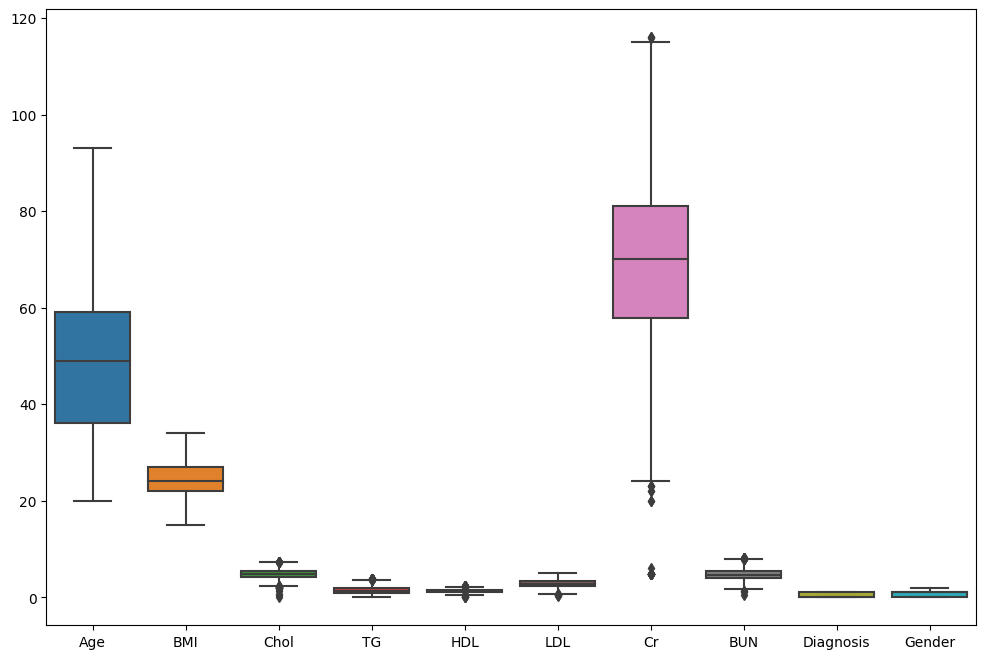

In [152]:
plt.figure(figsize = (12,8))
sn.boxplot(data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

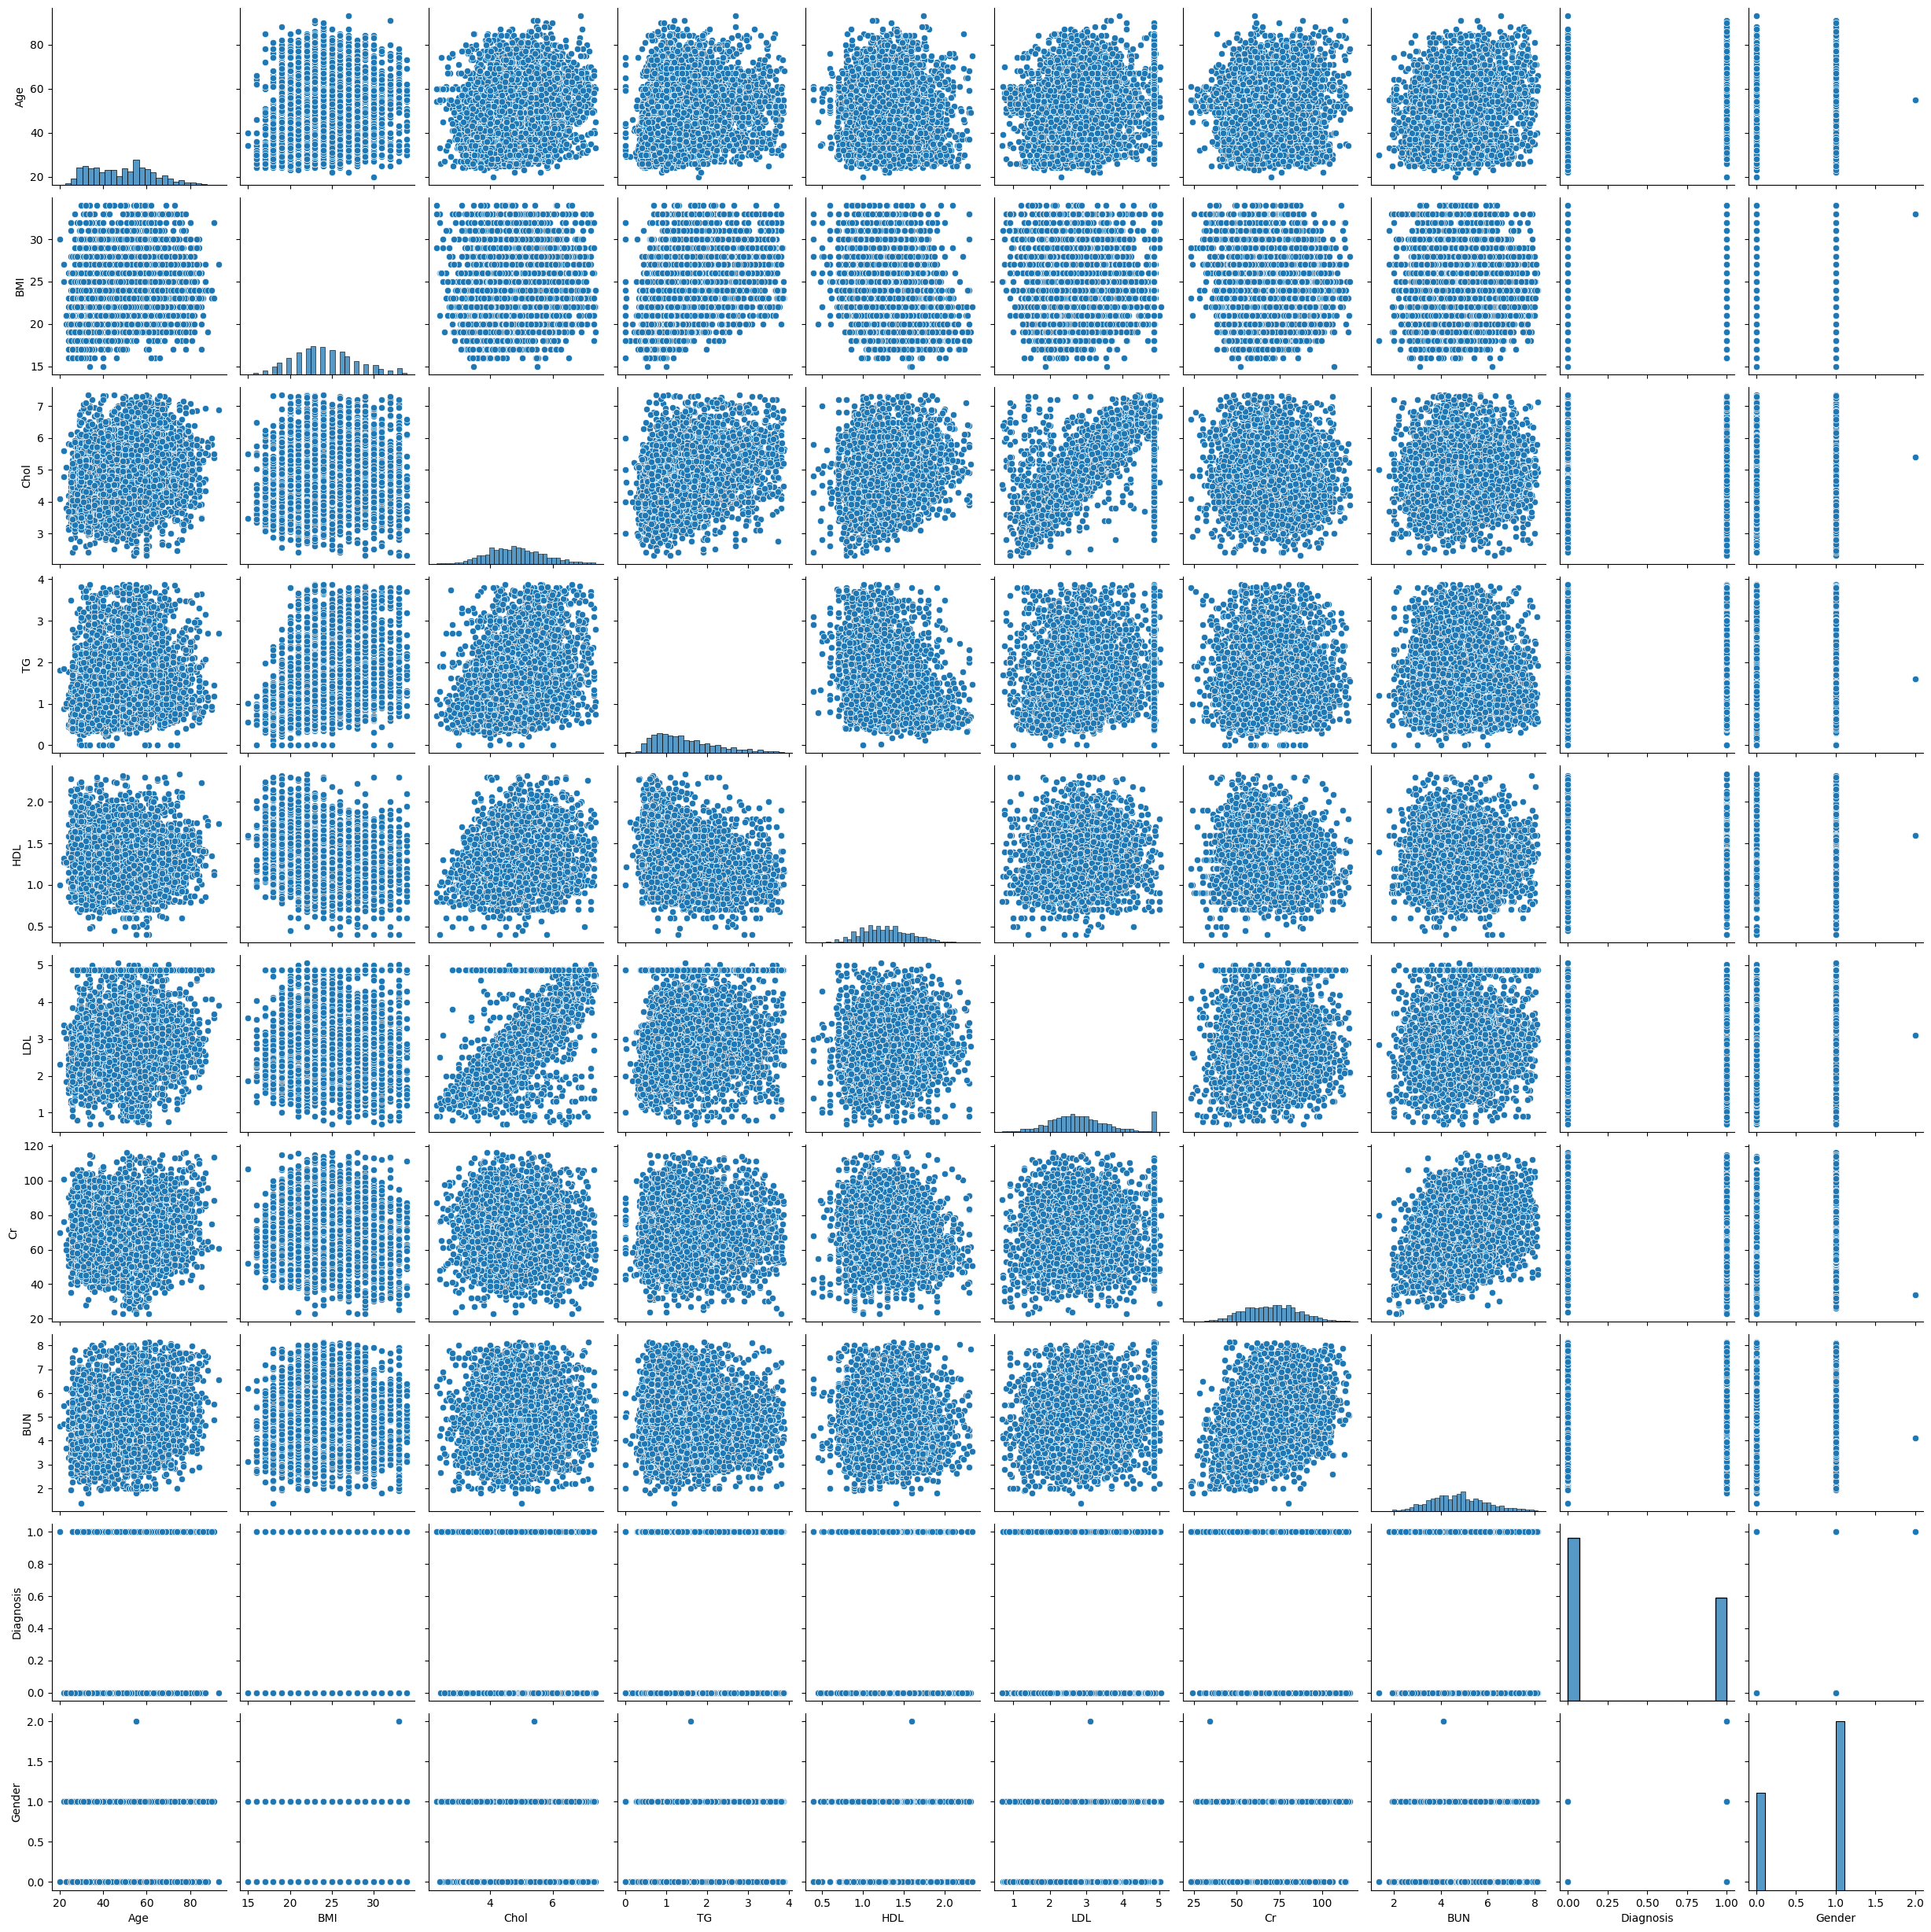

In [37]:
sn.pairplot(data)

<Axes: >

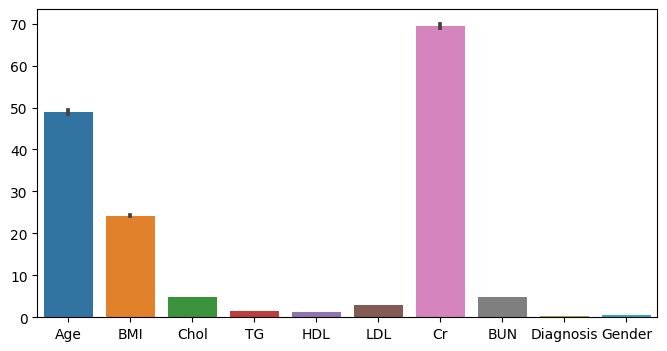

In [153]:
plt.figure(figsize = (8,4))
sn.barplot(data)

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x = data.drop(["Diagnosis"] , axis = 1)
y = data["Diagnosis"]

In [156]:
x_train ,x_test , y_train ,y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [157]:
x_train.isna().sum()

Age         0
BMI       122
Chol       64
TG        218
HDL       356
LDL        25
Cr         46
BUN        89
Gender      0
dtype: int64

In [158]:
x_test.isna().sum()

Age         0
BMI        29
Chol       15
TG         59
HDL       102
LDL         5
Cr         12
BUN        26
Gender      0
dtype: int64

In [159]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

In [160]:
x_train.isna().sum()
x_test.isna().sum()

Age       0
BMI       0
Chol      0
TG        0
HDL       0
LDL       0
Cr        0
BUN       0
Gender    0
dtype: int64

In [161]:
x_train.shape , x_test.shape

((4105, 9), (1027, 9))

In [162]:
data.std()

Age          14.048794
BMI           3.729737
Chol          0.911440
TG            0.789796
HDL           0.313892
LDL           0.915581
Cr           16.879343
BUN           1.191633
Diagnosis     0.487422
Gender        0.481926
dtype: float64

In [163]:
data.var()

Age          197.368608
BMI           13.910935
Chol           0.830723
TG             0.623778
HDL            0.098528
LDL            0.838289
Cr           284.912211
BUN            1.419988
Diagnosis      0.237580
Gender         0.232253
dtype: float64

In [164]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve  , roc_auc_score , classification_report , accuracy_score , confusion_matrix 

In [166]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [167]:
y_pred = model.predict(x_test)

In [168]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [169]:
pd.DataFrame({"y_test":y_test , "y_pred":y_pred})

,y_test,y_pred
5106,1,1
2186,0,0
2589,0,0
831,0,0
1421,0,0
...,...,...
1662,0,0
833,0,0
366,1,1
3778,0,0


In [170]:
accuracy = accuracy_score(y_test , y_pred)
print("accuracy_of logistic regression:",accuracy)

accuracy_of logistic regression: 0.7799415774099319


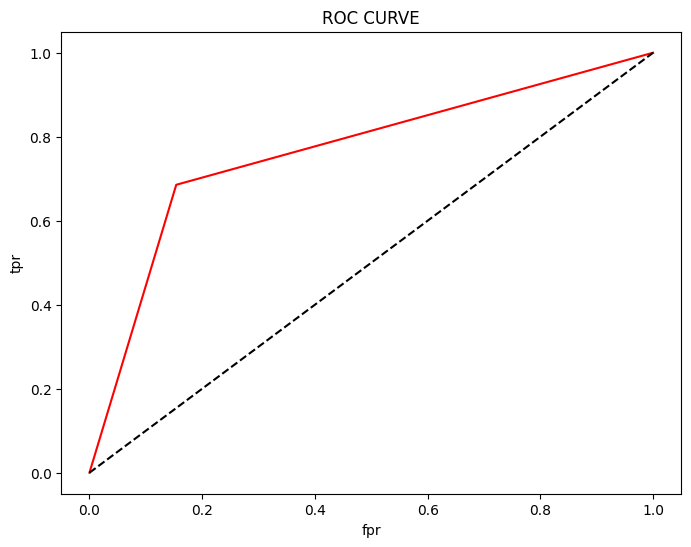

In [172]:
fpr , tpr,_ = roc_curve(y_test , y_pred)
auc = roc_auc_score(y_test , y_pred)
plt.figure(figsize = (8,6))
plt.plot(fpr , tpr , color = "red" , label = "(ROC CURVE = %0.2f)"%auc)
plt.plot([0,1],[0,1],'k--')
plt.title("ROC CURVE")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [173]:
classification_result = classification_report(y_test , y_pred)
print("classification_result:",classification_result)

classification_result:               precision    recall  f1-score   support

           0       0.79      0.85      0.82       604
           1       0.76      0.69      0.72       423

    accuracy                           0.78      1027
   macro avg       0.78      0.77      0.77      1027
weighted avg       0.78      0.78      0.78      1027

